In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Lendo CSV

In [2]:
# Lendo csv
df = pd.read_csv("casos_attr_2015.csv")

### Descrevendo atributos

In [3]:
df.columns.values

array(['program-id', 'applicant', 'penalty_AGP', 'penalty_BGK',
       'penalty_AVJLP', 'year', 'finish payment', 'concept:name',
       'penalty_BGP', 'basic payment', 'penalty_AJLP', 'greening',
       'penalty_AVGP', 'penalty_C16', 'penalty_B16', 'penalty_AVBP',
       'area', 'risk_factor', 'selected_manually', 'application',
       'penalty_C9', 'cross_compliance', 'tot_events', 'department',
       'penalty_C4', 'penalty_B5', 'selected_random', 'amount_applied0',
       'amount_applied3', 'amount_applied2', 'penalty_AUVP',
       'avg_event_interval', 'payment_actual2', 'start_time',
       'penalty_amount1', 'payment_actual3', 'penalty_amount3',
       'penalty_amount2', 'penalty_AVUVP', 'rejected', 'penalty_V5',
       'delta_time', 'payment_actual1', 'penalty_BGKV', 'penalty_B5F',
       'selected_risk', 'penalty_GP1', 'amount_applied1', 'small farmer',
       'penalty_amount0', 'penalty_CC', 'penalty_JLP5', 'penalty_JLP6',
       'penalty_JLP7', 'identity:id', 'penalty_JLP1',

In [4]:
df = df.dropna(axis=1, how='any')

In [5]:
# df.columns.to_series().groupby(df.dtypes).groups

In [6]:
# removendo colunas do tipo textual
string_columns = [u'applicant', u'concept:name', u'application', u'department',
                  u'start_time', u'identity:id', u'end_time']
df = df.drop(string_columns, axis=1)

# convertando booleanos para inteiros
bool_columns = [u'penalty_AGP', u'penalty_BGK', u'penalty_AVJLP', u'penalty_BGP',
                u'basic payment', u'penalty_AJLP', u'greening', u'penalty_AVGP',
                u'penalty_C16', u'penalty_B16', u'penalty_AVBP', u'selected_manually',
                u'penalty_C9', u'penalty_C4', u'penalty_B5', u'selected_random',
                u'penalty_AUVP', u'penalty_AVUVP', u'rejected', u'penalty_V5',
                u'penalty_BGKV', u'penalty_B5F', u'selected_risk', u'penalty_GP1',
                u'small farmer', u'penalty_CC', u'penalty_JLP5', u'penalty_JLP6',
                u'penalty_JLP7', u'penalty_JLP1', u'penalty_JLP2', u'penalty_JLP3',
                u'penalty_ABP', u'penalty_B6', u'penalty_B4', u'redistribution',
                u'penalty_B2', u'penalty_B3', u'young farmer']
df[bool_columns] *= 1

In [7]:
df.shape

(14750, 52)

In [8]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('finish payment')) #Remove b from list
df = df[cols + ['finish payment']]
df

,program-id,penalty_AGP,penalty_BGK,penalty_AVJLP,year,penalty_BGP,basic payment,penalty_AJLP,greening,penalty_AVGP,...,payment_actual0,penalty_ABP,penalty_B6,penalty_B4,redistribution,penalty_B2,penalty_B3,number_parcels,young farmer,finish payment
0,215,0,0,0,2015,0,1,0,1,0,...,2371.74,0,0,0,1,0,0,5,0,1
1,215,0,0,0,2015,0,1,0,1,0,...,36832.46,0,0,0,1,1,0,32,0,0
2,215,0,0,0,2015,0,1,0,1,0,...,1438.85,0,0,0,1,0,0,3,0,1
3,215,0,0,0,2015,0,1,0,1,0,...,16426.15,0,0,0,1,1,0,33,0,0
4,215,0,0,0,2015,0,1,0,1,0,...,7295.47,0,0,0,1,1,0,9,0,1
5,215,0,0,0,2015,0,1,0,1,0,...,40302.36,0,0,0,1,1,0,44,0,0
6,215,0,0,0,2015,0,1,0,1,0,...,47397.74,0,0,0,1,1,0,21,0,0
7,215,0,0,0,2015,0,1,0,1,0,...,23743.47,0,0,0,1,1,0,27,0,0
8,215,0,0,0,2015,0,1,0,1,0,...,2274.76,0,0,0,1,0,0,7,0,1
9,215,0,0,0,2015,0,1,0,1,0,...,23356.54,0,0,0,1,0,0,31,0,0


In [9]:
# Copiando os dados do csv
data = df.values.copy()

# Separando atributos de classes
x = data[:, :-1]  # x tem apenas valores entre a primeira e penúltima coluna
y = data[:, -1]  # y tem os valores da última coluna
y = [1 if i else 0 for i in y]

# 70% dos dados serão utilizados para treinamento e 30% para o teste
# A divisão será estratificada, serão mantidas as proporções de spam e não spam em cada grupo
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.7, stratify=y)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
x_treino.shape

(10325, 51)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Classificando com uma floresta árvores de decisão
cls_rf = RandomForestClassifier(n_estimators=100)
cls_rf.fit(x_treino, y_treino)
y_pred_rf = cls_rf.predict(x_teste)

print "Floresta árvores de decisão"
print classification_report(y_pred_rf, y_teste)

Floresta árvores de decisão
             precision    recall  f1-score   support

          0       0.92      0.89      0.90      1902
          1       0.92      0.94      0.93      2523

avg / total       0.92      0.92      0.92      4425



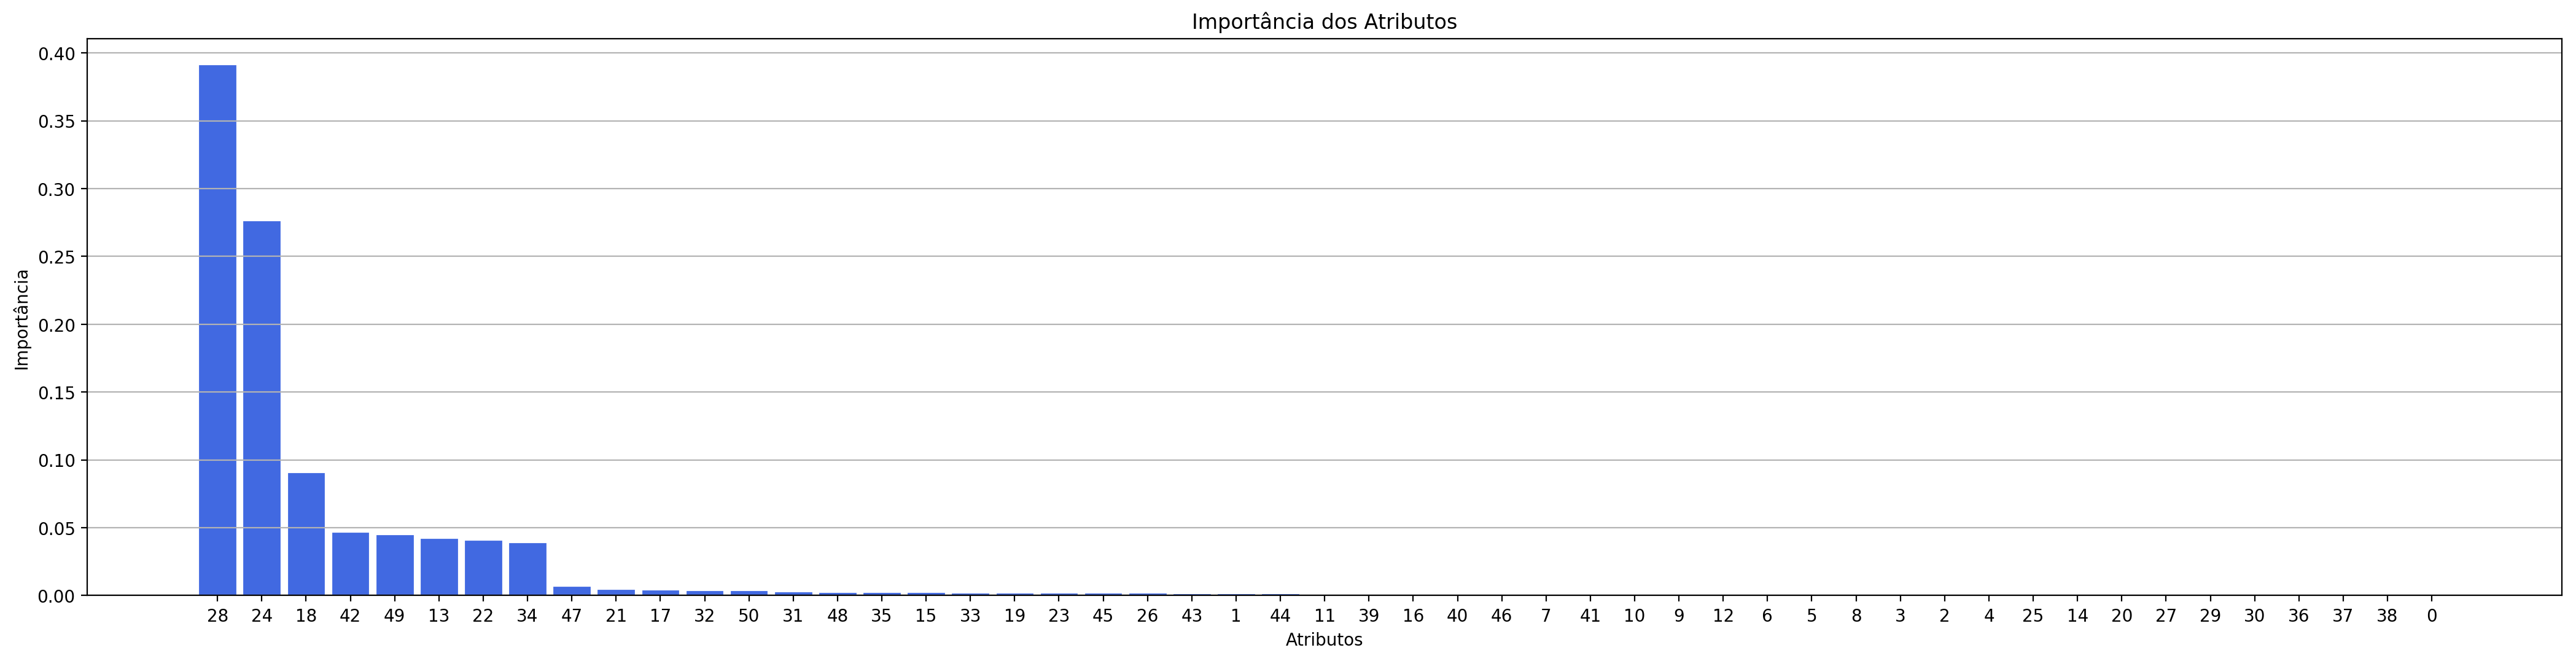

In [12]:
importances = cls_rf.feature_importances_
indices =  np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(26, 6), dpi=200)
plt.title(u"Importância dos Atributos")
plt.grid(b=True, which='both', color='0.7',linestyle='-', axis='y')
plt.xticks(range(len(indices)), indices)
plt.bar(range(len(indices)), importances[indices], color="#4169E1", align="center",edgecolor="#4169E1")
plt.xlabel(u"Atributos")
plt.ylabel(u"Importância")
plt.show()

In [13]:
colunas = list(df.columns.values)
for i in indices[:20]:
    print i, colunas[i]

28 delta_time
24 avg_event_interval
18 tot_events
42 payment_actual0
49 number_parcels
13 area
22 amount_applied0
34 penalty_amount0
47 penalty_B2
21 selected_random
17 cross_compliance
32 penalty_GP1
50 young farmer
31 selected_risk
48 penalty_B3
35 penalty_CC
15 selected_manually
33 small farmer
19 penalty_C4
23 penalty_AUVP
